In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import SeisBlast as sb

In [3]:
# #function to create a phase pick list from the event bulletin file
# def list_phasepicks(bulletin_dir,event_id):
#     with open(bulletin_dir + str(event_id) + ".bulletin") as bulletin:
#         phase_arrivals_data = []
#         phase_arrivals_started = False
#         lines = bulletin.readlines()

#         for line in lines:
#             line = line.strip()
#             # Identify the phase arrivals section
#             match = re.match(r'^(\d+)\s+Phase arrivals', line)
#             if match:
#                 num_lines = int(match.group(1))
#                 phase_arrivals_started = True
#                 continue
#             # Extract phase arrivals data
#             if phase_arrivals_started:
#                 if line:  # Non-empty line
#                     if not line.startswith('sta'):  # Skip the header line
#                         parts = re.split(r'\s+', line)
#                         if len(parts) == 10:  # Ensure we have the correct number of columns
#                             phase_arrivals_data.append(parts)                        
                            
#                             #lines_read += 1
#                 #if lines_read >= num_lines:
#                 #    break

#                 elif line == '':  # Stop when an empty line is encountered
#                     break

#     # Create DataFrame for phase arrivals data
#     phase_columns = ['sta', 'net', 'dist', 'azi', 'phase', 'time', 'res', 'wt', 'notsure','sta_repeat']
#     event_picks_df = pd.DataFrame(phase_arrivals_data, columns=phase_columns)
#     # Drop the redundant column
#     event_picks_df.drop(columns=['sta_repeat'], inplace=True)
#     return event_picks_df 

In [4]:
# # function to find the average pick time difference for a event
# def pick_time_diff(catalogue,event_id,bulletin1,bulletin2):
    
#     print('-- reading event id:',event_id,'--\n')
    
#     ev_id_index = catalogue.index[catalogue['EVENT-ID'] == event_id].tolist()[0]
#     ev_origin_time = pd.to_datetime((catalogue.loc[ev_id_index, 'DATE'] + ' ' + catalogue.loc[ev_id_index, 'TIME']), format='%Y-%m-%d %H:%M:%S.%f')
    
#     #create pick list from bulletin files
#     bul1_picks = list_phasepicks(bulletin1,event_id)
#     bul2_picks = list_phasepicks(bulletin2,event_id)
#     print('    > bulletin_1 has', bul1_picks.shape[0], 'times; bulletin_2 has', bul2_picks.shape[0])

#     merge_picks = pd.merge(bul1_picks, bul2_picks, on=['sta','phase'], suffixes=['1','2'])
#     #convert all times to datetime
#     merge_picks['time1'] = pd.to_datetime((catalogue.loc[ev_id_index, 'DATE'] + ' ' + merge_picks['time1']), format='%Y-%m-%d %H:%M:%S.%f')
#     merge_picks['time2'] = pd.to_datetime((catalogue.loc[ev_id_index, 'DATE'] + ' ' + merge_picks['time2']), format='%Y-%m-%d %H:%M:%S.%f')
#     #convert to seconds from origin time
#     merge_picks['time1_seconds'] = (merge_picks['time1'] - ev_origin_time).dt.total_seconds()
#     merge_picks['time2_seconds'] = (merge_picks['time2'] - ev_origin_time).dt.total_seconds()
#     #find time difference between the two pick lists
#     merge_picks['time_diff_seconds'] = merge_picks['time2_seconds'] - merge_picks['time1_seconds']
#     #filter all zero elements from dataframe
#     zero_merge_picks = merge_picks[merge_picks['time_diff_seconds'] == 0].dropna(how='all').dropna(axis=1,how='all')

#     if merge_picks.shape[0] == zero_merge_picks.shape[0] :
#         print('    > all common station and phase picks are equal\n')
#         return
#     else :
#         nonzero_merge_picks = merge_picks[merge_picks['time_diff_seconds'] != 0].dropna(how='all').dropna(axis=1,how='all')
#         print('    > out of', merge_picks.shape[0], 'common station and phase picks.', nonzero_merge_picks.shape[0], 'pick times are different\n' )
#         return nonzero_merge_picks

In [5]:
#Read common catalogue
s_bul_dir = "/mnt/store/senad/repos/for_bruna/SEISCOMP_EVENTS/BULLETINS/"
j_bul_dir = "/mnt/REPO/QUARRY-BLASTS/BULLETINS/"
quarry_catalogue = pd.read_csv('/mnt/home_geo/bmelo/bin/Quarry/qb_catalogue.csv')
unnamed_cols = quarry_catalogue.columns[quarry_catalogue.columns.str.contains('^Unnamed')]
quarry_catalogue = quarry_catalogue.drop(columns=unnamed_cols)
quarry_catalogue

,EVENT-ID,DATE,TIME,LAT(deg),LAT-ERR(km),LON(deg),LON-ERR(km),DEPTH(km),RMS(s),AZ-GAP(deg),N_PHASES,MAG(ML)
0,dias2013ounh,2013-07-30,10:56:29.388,54.11401,0.847,-8.17115,1.370,0.0,0.451,77.3,36,1.18
1,dias2013psgr,2013-08-12,10:51:10.146,54.82306,2.148,-6.06838,1.228,0.0,0.612,105.1,25,1.24
2,dias2013qvsa,2013-08-28,13:32:30.950,52.89928,1.061,-9.06385,1.245,0.0,0.316,93.1,35,1.30
3,dias2013qxms,2013-08-29,13:07:57.382,53.37685,1.126,-9.19604,1.019,0.0,0.481,86.4,42,1.17
4,dias2013rlzk,2013-09-06,11:26:58.830,54.58620,1.844,-5.78568,1.187,0.0,0.864,83.3,23,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...
452,dias2014youk,2014-12-16,15:03:55.757,53.43753,1.182,-7.13625,1.406,0.0,0.517,74.2,22,0.84
453,dias2014yqky,2014-12-17,12:33:37.545,54.18931,1.308,-7.71352,1.613,0.0,0.384,95.9,21,1.05
454,dias2014yqlg,2014-12-17,12:43:34.385,54.30775,1.774,-6.61528,1.897,0.0,0.305,79.2,12,0.84
455,dias2014yqnf,2014-12-17,13:42:33.755,53.97838,0.864,-8.25212,1.332,0.0,0.404,82.2,36,1.34


In [6]:
#read one event as an example
event_id = 'dias2013ounh'
ev_diff_picks = pick_time_diff(quarry_catalogue,event_id,s_bul_dir,j_bul_dir)
ev_diff_picks

-- reading event id: dias2013ounh --

    > bulletin_1 has 30 times; bulletin_2 has 36
    > out of 28 common station and phase picks. 6 pick times are different



,sta,net1,dist1,azi1,phase,time1,res1,wt1,notsure1,net2,dist2,azi2,time2,res2,wt2,notsure2,time1_seconds,time2_seconds,time_diff_seconds
0,IA002,IA,0.31134,318.0,P,2013-07-30 10:56:35.777,0.360,M,1.0,IA,0.31470,319.7,2013-07-30 10:56:35.463,-0.052,M,1.0,6.389,6.075,-0.314
3,IAD18,IA,0.49940,187.0,S,2013-07-30 10:56:44.507,-1.400,MX,0.0,IA,0.48952,186.3,2013-07-30 10:56:44.398,-0.456,M,1.0,15.119,15.010,-0.109
5,IA009,IA,0.54169,241.0,S,2013-07-30 10:56:47.781,0.470,M,1.0,IA,0.53266,242.4,2013-07-30 10:56:46.925,0.646,M,1.0,18.393,17.537,-0.856
15,IA010,IA,0.79724,124.0,S,2013-07-30 10:56:55.992,0.310,M,1.0,IA,0.79743,123.2,2013-07-30 10:56:55.128,0.097,M,1.0,26.604,25.740,-0.864
18,DL21,SM,1.00060,17.0,S,2013-07-30 10:57:02.761,0.430,M,1.0,SM,1.01115,16.5,2013-07-30 10:57:01.103,-0.963,M,1.0,33.373,31.715,-1.658
20,IGLA,EI,1.00780,226.0,S,2013-07-30 10:57:02.442,-0.140,M,1.0,EI,0.99749,226.2,2013-07-30 10:57:01.429,-0.216,M,1.0,33.054,32.041,-1.013


In [7]:
#read all events ids in a loop and make pick comparison

comp_bull_stats = []

for id in quarry_catalogue['EVENT-ID']: #.iloc[:100]:

    ev_diff_picks = pick_time_diff(quarry_catalogue,id,s_bul_dir,j_bul_dir)
    if ev_diff_picks is not None :
        ev_mean = ev_diff_picks['time_diff_seconds'].mean()
        ev_max = max(ev_diff_picks['time_diff_seconds'], key=abs)
        ev_sdt = np.std(ev_diff_picks['time_diff_seconds'])
        comp_bull_stats.append([id, ev_mean, ev_max, ev_sdt])

comp_bull_head = ['id', 'mean', 'max','standard_dev']
comp_bulletins = pd.DataFrame(comp_bull_stats, columns=comp_bull_head).dropna()

-- reading event id: dias2013ounh --

    > bulletin_1 has 30 times; bulletin_2 has 36
    > out of 28 common station and phase picks. 6 pick times are different

-- reading event id: dias2013psgr --

    > bulletin_1 has 13 times; bulletin_2 has 25
    > all common station and phase picks are equal

-- reading event id: dias2013qvsa --

    > bulletin_1 has 20 times; bulletin_2 has 35
    > all common station and phase picks are equal

-- reading event id: dias2013qxms --

    > bulletin_1 has 25 times; bulletin_2 has 42
    > all common station and phase picks are equal

-- reading event id: dias2013rlzk --

    > bulletin_1 has 17 times; bulletin_2 has 23
    > all common station and phase picks are equal

-- reading event id: dias2013rmcr --

    > bulletin_1 has 33 times; bulletin_2 has 56
    > out of 25 common station and phase picks. 1 pick times are different

-- reading event id: dias2013rmct --

    > bulletin_1 has 23 times; bulletin_2 has 35
    > all common station and ph

In [8]:
#output of the pick comparison. all other are equal
#check if it is more negative values than positive?
std_values = comp_bulletins[(comp_bulletins['standard_dev'] > 0.5)]
#std_values.head(5)
comp_bulletins.shape
#neg_values.shape


(145, 4)

Text(0, 0.5, 'Time (s)')

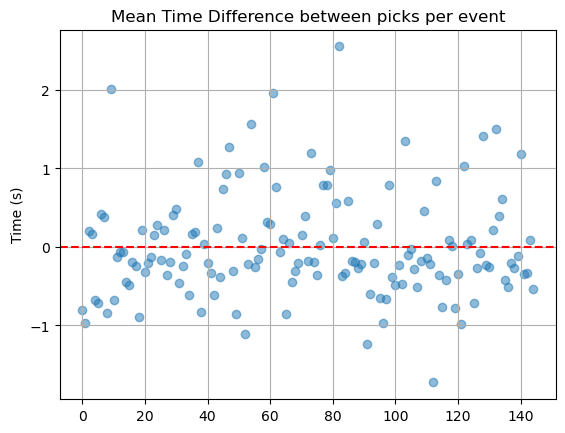

In [9]:
#visualize the different picks
zeros_vector = np.zeros(len(comp_bulletins['mean']))
plt.scatter(comp_bulletins.index,comp_bulletins['mean'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
# Add titles and labels
plt.title('Mean Time Difference between picks per event')
plt.ylabel('Time (s)')



In [10]:
#event_id = comp_bulletins.loc[comp_bulletins['standard_dev'].idxmax()]['id']
event_id = 'dias2013suyf'
ev_diff_picks = pick_time_diff(quarry_catalogue,event_id,s_bul_dir,j_bul_dir)
ev_diff_picks

-- reading event id: dias2013suyf --

    > bulletin_1 has 11 times; bulletin_2 has 26
    > out of 11 common station and phase picks. 2 pick times are different



,sta,net1,dist1,azi1,phase,time1,res1,wt1,notsure1,net2,dist2,azi2,time2,res2,wt2,notsure2,time1_seconds,time2_seconds,time_diff_seconds
0,IA005,IA,0.25105,245.0,P,2013-09-25 14:35:27.479,-1.170,M,1.0,IA,0.25854,244.8,2013-09-25 14:35:28.452,-0.481,M,1.0,3.608,4.581,0.973
8,IWEX,EI,1.27145,81.0,S,2013-09-25 14:36:04.493,0.040,M,1.0,EI,1.26544,80.8,2013-09-25 14:36:03.952,-0.296,M,1.0,40.622,40.081,-0.541


In [11]:
#read seismogram from a certain event
ev_catalogue = quarry_catalogue.loc[quarry_catalogue['EVENT-ID'] == event_id]
ev_date = UTCDateTime(ev_catalogue['DATE'].values[0] + ev_catalogue['TIME'].values[0])
#select a station and phase pick
ev_i = 0
ev_net = ev_diff_picks['net1'][ev_i]
ev_station = ev_diff_picks['sta'][ev_i]
s_pick = ev_diff_picks['time1'][ev_i]
j_pick = ev_diff_picks['time2'][ev_i]
waveform = read('/mnt/REPO/MINISEED/' + str(ev_date.year) + '/'+ ev_net +'/'+ ev_station + '/HHZ.D/' + ev_net + '.' + ev_station + '..HHZ.D.' + str(ev_date.year) + '.' + str(ev_date.julday))
waveform[0].stats

         network: IA
         station: IA005
        location: 
         channel: HHZ
       starttime: 2013-09-25T00:00:00.000000Z
         endtime: 2013-09-25T23:59:59.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 29162, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 14930944})

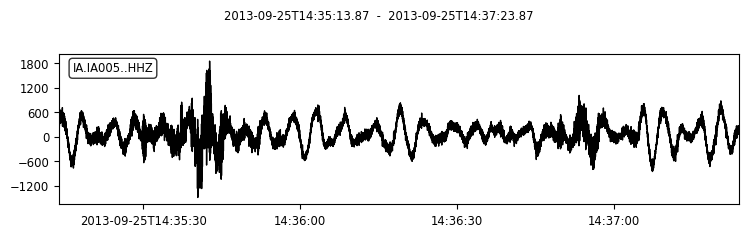

In [13]:
#tr=st.merge(method = 0, fill_value = 'latest') #[0]
# Set the custom time interval
tr_slice = waveform.slice(ev_date - 10, ev_date + 120)
tr_slice.plot( tick_format='%I:%M %p');
#starttime=ev_date - 10, endtime=ev_date + 120);

[None]

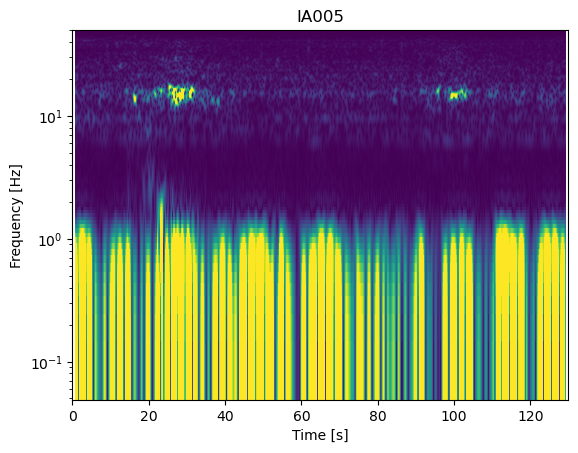

In [ ]:
tr_slice.spectrogram(log=True, title=ev_station, clip=[0.0,0.20],outfile='spec_nofilter.png')

In [ ]:
s_arrivals = model.get_travel_times(source_depth_in_km=0,
...                                   distance_in_degree=s_dist,
...                                   phase_list=["P", "S"])
s_at = (ev_date + s_arrivals[0].time)
print(s_at)

NameError: name 's_dist' is not defined

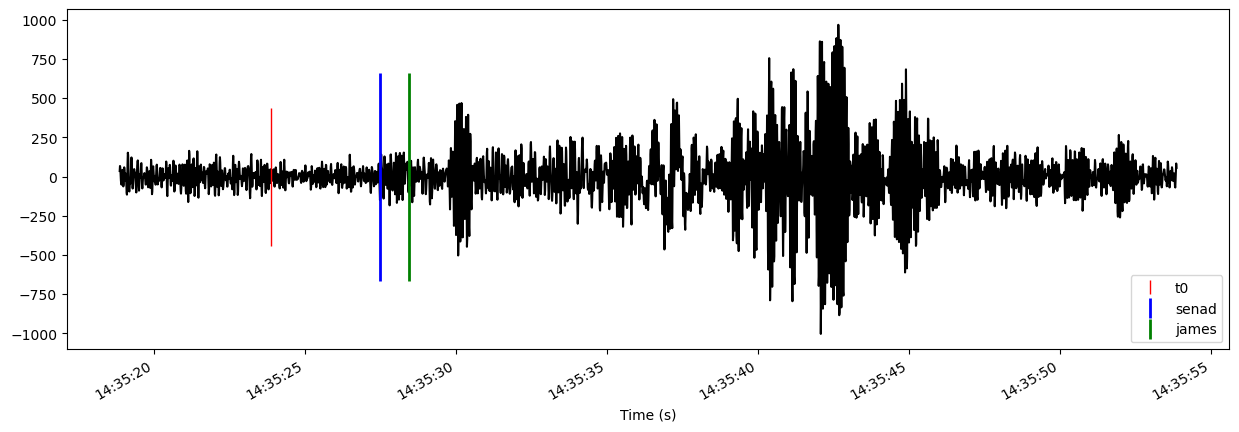

NameError: name 'wave_filter' is not defined

In [ ]:
#filter and cut the seismogram
def bpass(seismogram,min,max):
    tr_filt = seismogram.copy()
    tr_filt.filter('bandpass', freqmin=min, freqmax=max, corners=2, zerophase=True)
    tr2 = tr_filt.slice(ev_date - 5, ev_date + 30)
    return tr2

tr2 = bpass(tr_slice,1,20)
#filtered full event
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.plot(tr2[0].times("matplotlib"), tr2[0].data, "k-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.plot(ev_date,0,"|r",markersize=100,markeredgewidth=1, label='t0')
plt.plot(s_pick,0,"|b",markersize=150,markeredgewidth=2, label='senad')
plt.plot(j_pick,0,"|g",markersize=150,markeredgewidth=2, label='james')
ax.legend(loc='lower right',markerscale=0.1)
plt.xlabel('Time (s)')
# Display the plot
plt.show()
plt.savefig(wave_filter.png)
